In [1]:
import sys
import os 
import matplotlib.pyplot as plt
import torch 
from torchvision import datasets

sys.path.append('/home/tuxae/MVA/recvis21_a3')
from src import utils

In [2]:
%load_ext autoreload
%autoreload 2

## Get data

In [3]:
# Data initialization and loading
from src.data import data_transforms

batch_size = 32
data = "../bird_dataset"

train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(data + "/train_images", transform=data_transforms),
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
)
val_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(data + "/val_images", transform=data_transforms),
    batch_size=batch_size,
    shuffle=False,
    num_workers=0,
)

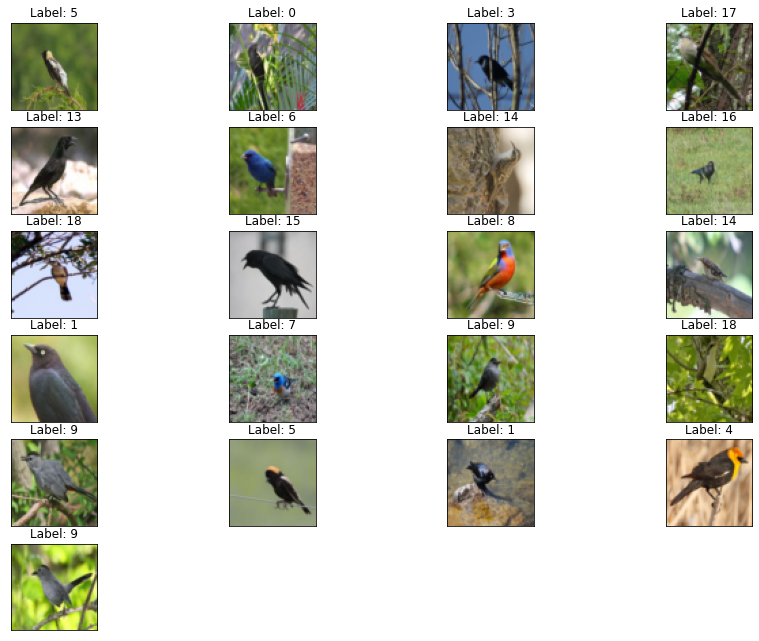

In [4]:
utils.show_images_with_labels(train_loader)

## Naive approach: use transfer learning

Take a pretrained model and only change the last layer so that it fits the number of classes we want to predict i.e. 20. 

In [26]:
from src.model import Net
from torchsummary import summary


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_path = "../experiment/model_6.pth"
model = Net().to(device)
model.load_state_dict(torch.load(model_path))
print("Model summary")
summary(model, (3, 64, 64))

Model summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              SiLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]             576
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              SiLU-6           [-1, 64, 32, 32]               0
 AdaptiveAvgPool2d-7             [-1, 64, 1, 1]               0
            Conv2d-8             [-1, 16, 1, 1]           1,040
              SiLU-9             [-1, 16, 1, 1]               0
           Conv2d-10             [-1, 64, 1, 1]           1,088
          Sigmoid-11             [-1, 64, 1, 1]               0
SqueezeExcitation-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 32, 32, 32]           2,048
      BatchNorm2d-14     

## Let's visualize the outputs of our model on some images from the validation set

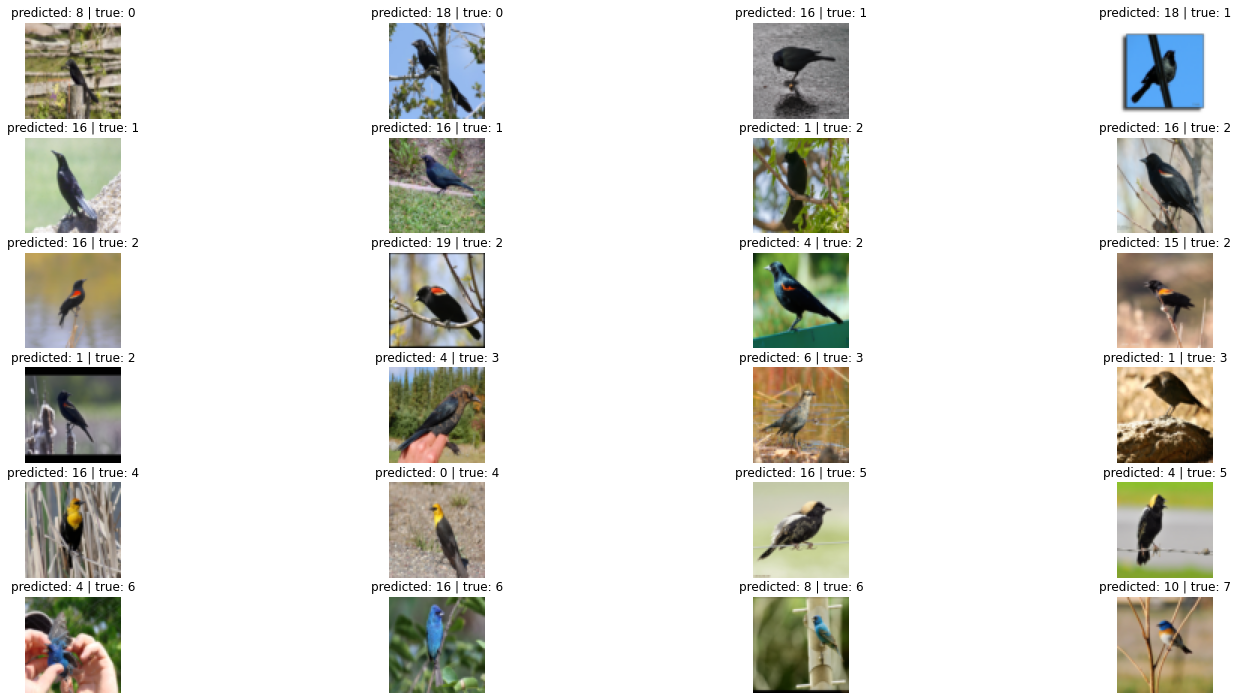

In [21]:
utils.visualize_model(model, val_loader, device, num_images=24, figsize=(25,25))

As we can see the model has very bad accuracy and is not able to correctly predict the class of birds. Our naive idea to use only transfer learning for direct classification does not work. We need something smarter.